In [59]:
import pysentiment2 as py
import pandas as pd

In [60]:
#data = the file with all deal info

In [64]:
hiv4 = py.HIV4()
import nltk
#Remove all stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['News'] = data['News'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [65]:
data['sentiment']=data['News'].apply(lambda x: hiv4.get_score(hiv4.tokenize(x)))

In [66]:
data['sentiment'].iloc[0].keys()
data['postive']=data['sentiment'].apply(lambda x: x['Positive'])
data['negative']=data['sentiment'].apply(lambda x: x['Negative'])
data['polarity']=data['sentiment'].apply(lambda x: x['Polarity'])

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
x=data['polarity']
result = smf.ols(formula='polarity ~ postive + negative', data=data).fit()

polarity    15.389692
dtype: float64


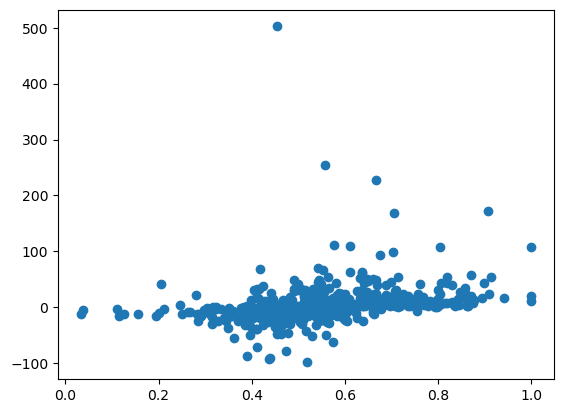

In [70]:
print(results.params)
 
import matplotlib.pyplot as plt
plt.scatter(x,data['Stock Price Change']*100)


In [71]:
group1=data[data['Acquiror Macro Industry'].isin(['Consumer Staples','Consumer Products and Services','Retail'])]
group2=data[data['Acquiror Macro Industry'].isin(['Financial Services','Real Estate'])]
group3=data[data['Acquiror Macro Industry'].isin(['Industrials','Energy and Power','Materials'])]
group4=data[data['Acquiror Macro Industry'].isin(['High Technology','Telecommunications','Media and Entertainment'])]
group5=data[data['Acquiror Macro Industry'].isin(['Healthcare'])]
#now do an anove test to see if the stock price percentage change is common across all industry
import scipy.stats as stats
result=stats.f_oneway(group1['Stock Price Change'],group2['Stock Price Change'],group3['Stock Price Change'],group4['Stock Price Change'],group5['Stock Price Change'])
print(result)


F_onewayResult(statistic=0.2085802578767678, pvalue=0.9336370235210099)


In [72]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

all_data = pd.concat([group1['Stock Price Change'], group2['Stock Price Change'],
                      group3['Stock Price Change'], group4['Stock Price Change'],
                      group5['Stock Price Change']])

group_labels = ['Group1'] * len(group1) + ['Group2'] * len(group2) + ['Group3'] * len(group3) + ['Group4'] * len(group4) + ['Group5'] * len(group5)
tukey_results = pairwise_tukeyhsd(all_data, group_labels)
print(tukey_results.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Group1 Group2  -0.0735 0.9902 -0.5043 0.3573  False
Group1 Group3   -0.016 0.9984 -0.1656 0.1336  False
Group1 Group4  -0.0072 0.9999 -0.1648 0.1503  False
Group1 Group5   -0.043 0.9518 -0.2065 0.1205  False
Group2 Group3   0.0575 0.9958 -0.3617 0.4767  False
Group2 Group4   0.0662 0.9929 -0.3558 0.4883  False
Group2 Group5   0.0305 0.9997 -0.3938 0.4548  False
Group3 Group4   0.0087 0.9997 -0.1134 0.1309  False
Group3 Group5   -0.027 0.9793 -0.1567 0.1027  False
Group4 Group5  -0.0358 0.9552 -0.1746 0.1031  False
---------------------------------------------------
